In [1]:
try:
    from roboflow import Roboflow
    from ultralytics import YOLO
except ImportError:
    !pip install ultralytics roboflow
    import os
    os.kill(os.getpid(), 9)

from IPython.display import display, Image
from google.colab import drive
import os
import glob
from IPython.display import Image, display
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
drive.mount('/content/drive/',)

Mounted at /content/drive/


In [3]:
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="xKAU4LBxrWxkto7KxzPE")
project = rf.workspace("middle-east-tech-university").project("fire-and-smoke-detection-hiwia")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-and-smoke-detection-2 in yolov8:: 100%|██████████| 30686/30686 [00:17<00:00, 1760.87it/s]


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 plots=True imgsz=220  #patience=300

/content
100% 6.25M/6.25M [00:00<00:00, 335MB/s]
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/fire-and-smoke-detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=220, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

In [6]:
# สร้างโฟลเดอร์ใน Drive
save_dir = "/content/drive/MyDrive/YOLO/yolo_models"
!mkdir -p "{save_dir}"

# คัดลอกไฟล์ best.pt และ last.pt
shutil.copy("/content/runs/detect/train/weights/best.pt", save_dir)
shutil.copy("/content/runs/detect/train/weights/last.pt", save_dir)

print(f"บันทึกไฟล์เรียบร้อยที่: {save_dir}")

บันทึกไฟล์เรียบร้อยที่: /content/drive/MyDrive/YOLO/yolo_models


In [14]:
# กำหนด path ต้นทางและปลายทาง
source_path = "/content/runs"  # โฟลเดอร์ที่ต้องการคัดลอก
destination_path = "/content/drive/MyDrive/YOLO/yolo_train_data"  # ปลายทางใน Drive

# ลบโฟลเดอร์เก่าใน Drive (ถ้ามี)
shutil.rmtree(destination_path, ignore_errors=True)

# คัดลอกทั้งโฟลเดอร์ (รวมไฟล์ย่อย)
shutil.copytree(source_path, destination_path)

print(f"คัดลอกเสร็จสิ้น! ตรวจสอบได้ที่: {destination_path}")

คัดลอกเสร็จสิ้น! ตรวจสอบได้ที่: /content/drive/MyDrive/YOLO/yolo_train_data


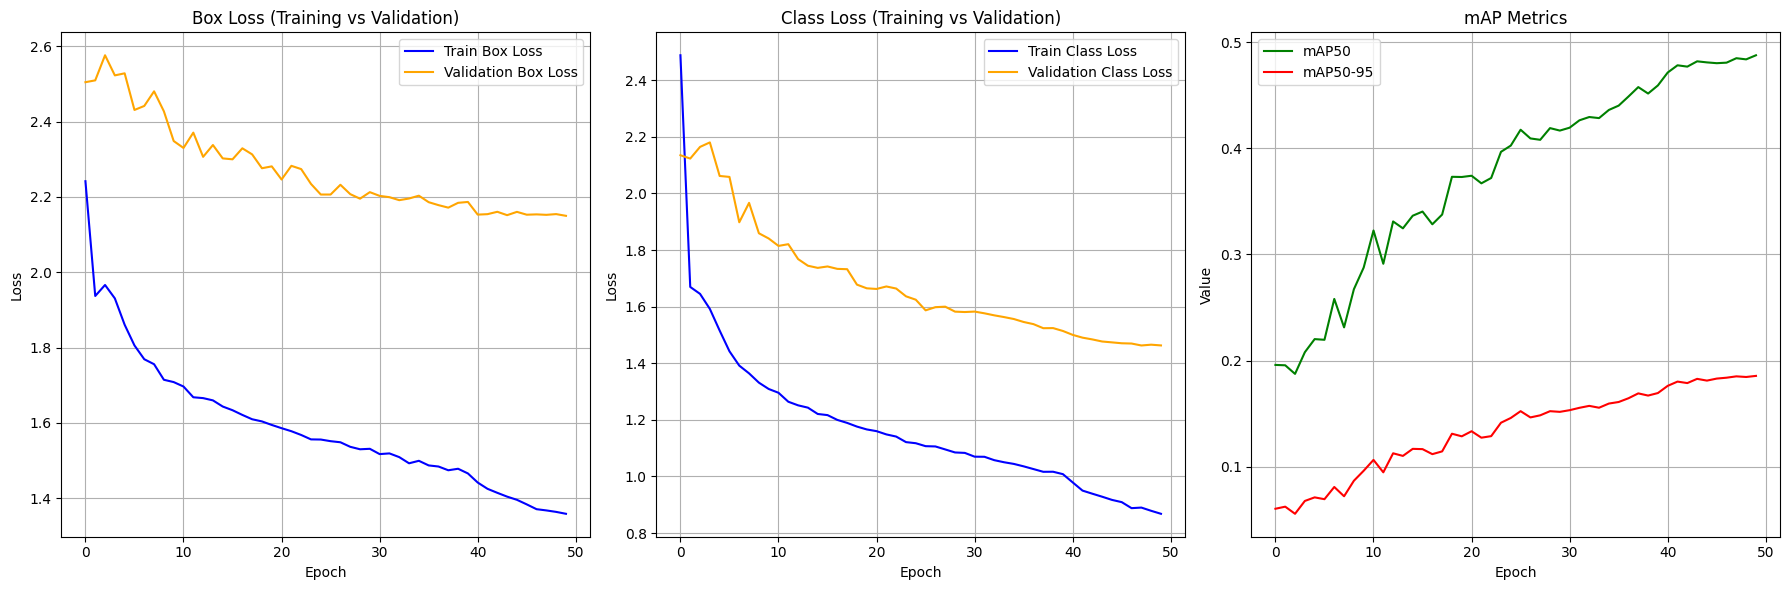

In [8]:
# อ่านข้อมูลจากไฟล์ results.csv
results_csv = f"{HOME}/runs/detect/train/results.csv"
results = pd.read_csv(results_csv)

# สร้างกราฟ Loss และ mAP
plt.figure(figsize=(18, 6))

# แสดง Box Loss และ Class Loss
plt.subplot(1, 3, 1)
plt.plot(results['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(results['val/box_loss'], label='Validation Box Loss', color='orange')
plt.title('Box Loss (Training vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(results['train/cls_loss'], label='Train Class Loss', color='blue')
plt.plot(results['val/cls_loss'], label='Validation Class Loss', color='orange')
plt.title('Class Loss (Training vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# แสดง mAP50(B) และ mAP50-95(B) ตามชื่อคอลัมน์จริง
plt.subplot(1, 3, 3)
plt.plot(results['metrics/mAP50(B)'], label='mAP50', color='green')
plt.plot(results['metrics/mAP50-95(B)'], label='mAP50-95', color='red')
plt.title('mAP Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# โหลดโมเดล best.pt
model = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")

# ทำ Validation และสร้างรายงาน
metrics = model.val(
    data=f"{dataset.location}/data.yaml",
    split="test",
    conf=0.5,
    iou=0.5,
    plots=True
)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/fire-and-smoke-detection-2/test/labels... 637 images, 1 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:01<00:00, 386.60it/s]


val: New cache created: /content/datasets/fire-and-smoke-detection-2/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:08<00:00,  4.95it/s]


                   all        637       1891      0.792      0.232      0.515       0.26
                  fire        459        995      0.812      0.312      0.567      0.261
                 smoke        490        896      0.773      0.152      0.463      0.258
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val


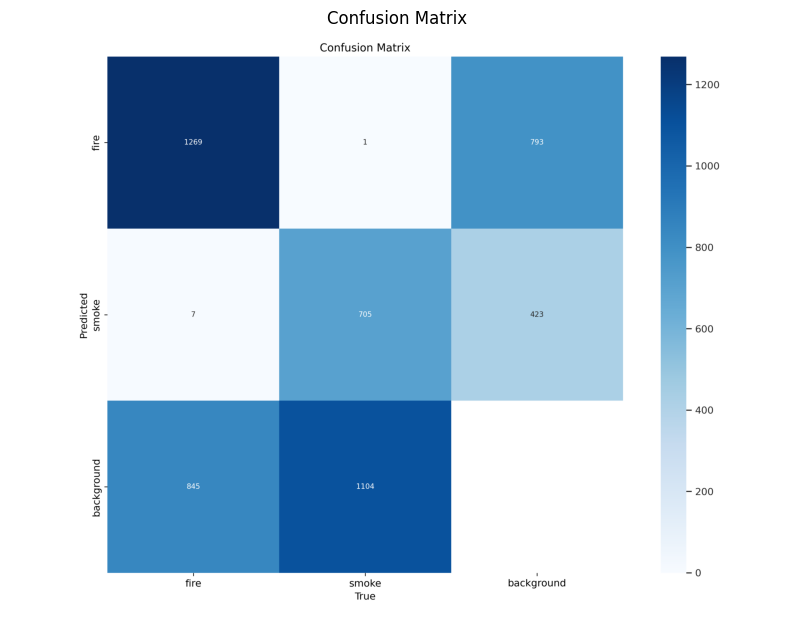


=== Performance Metrics ===
Precision (ความแม่นยำ): 0.79
Recall (การตรวจจับครบ): 0.23
mAP50: 0.51
mAP50-95: 0.26

หมายเหตุ:
- mAP50: Mean Average Precision ที่ IoU=0.5
- mAP50-95: mAP เฉลี่ยที่ IoU=0.5 ถึง 0.95
- Precision: อัตราการตรวจจับถูกต้องจากทั้งหมดที่โมเดลทำนาย
- Recall: อัตราการตรวจจับถูกต้องจากทั้งหมดที่ควรตรวจจับ


In [13]:
# แสดง Confusion Matrix
confusion_matrix_path = f"{HOME}/runs/detect/train/confusion_matrix.png"
confusion_matrix = mpimg.imread(confusion_matrix_path)
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix)
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()

# แสดงผลลัพธ์หลัก
print("\n=== Performance Metrics ===")
print(f"Precision (ความแม่นยำ): {metrics.box.mp:.2f}")
print(f"Recall (การตรวจจับครบ): {metrics.box.mr:.2f}")
print(f"mAP50: {metrics.box.map50:.2f}")
print(f"mAP50-95: {metrics.box.map:.2f}")

# คำอธิบายเพิ่มเติม
print("\nหมายเหตุ:")
print("- mAP50: Mean Average Precision ที่ IoU=0.5")
print("- mAP50-95: mAP เฉลี่ยที่ IoU=0.5 ถึง 0.95")
print("- Precision: อัตราการตรวจจับถูกต้องจากทั้งหมดที่โมเดลทำนาย")
print("- Recall: อัตราการตรวจจับถูกต้องจากทั้งหมดที่ควรตรวจจับ")

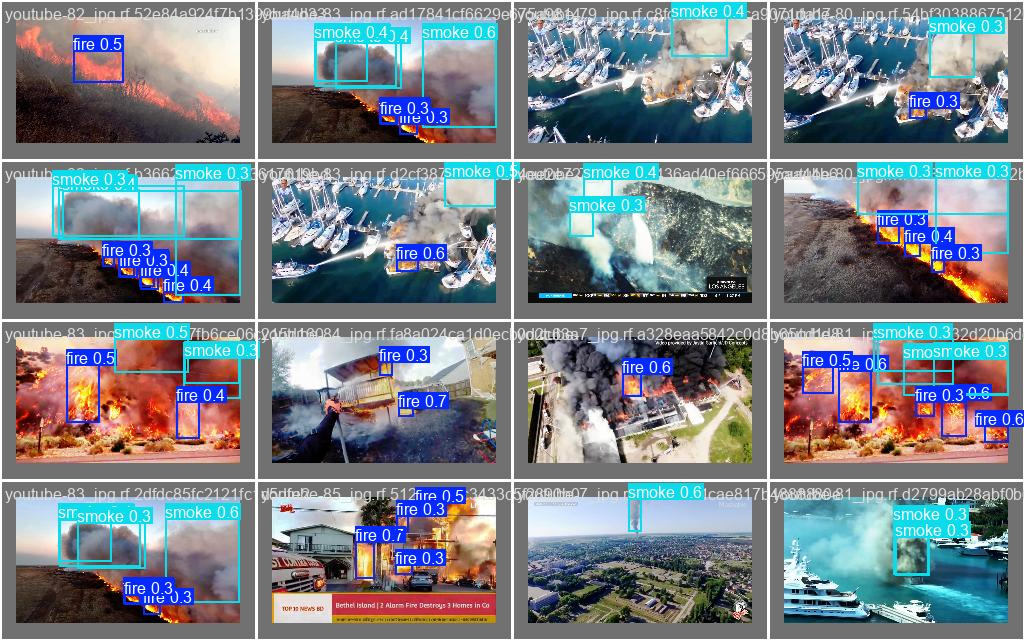

In [15]:
for image_path in glob.glob(f'{HOME}/runs/detect/train/val_batch0_pred.jpg')[:10]:
      display(Image(filename=image_path, width=400))
      print("\n")